Text preprocessing

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Word embeddings

The word embedding models are said to be self supervised. It is both unsupervised in the sense that the input data, the corpus is unlabeled, and supervised in the sense that the data itself provides the necessary context which would ordinarily make up the labels. 

There are several Word Embedding Methods present:

**Classical Methods**

**Word2Vec**

 Word2Vec is a predictive Deep learning based model to compute and generate high quality, distributed and continuous dense vector representations of words, which capture contextual and semantic similarity. 
 
 There are two different model architectures which can be leveraged by Word2Vec to create these word embedding representations. These include,
*   The Continuous Bag of Words (CBOW) Model
*   The Skip-gram Model


**Continuous bag-of-words (CBOW)** 

 The model learns to predict the center word given some context words. Considering a simple sentence, "the quick brown fox jumps over the lazy dog", this can be pairs of (context_window, target_word) where if we consider a context window of size 2, we have examples like ([quick, fox], brown), ([the, brown], quick), ([the, dog], lazy) and so on.

 CBOW architecture is a deep learning classification model such that we take in the context words as our input, X and try to predict the target word, Y. In fact building this architecture is simpler than the skip-gram model where we try to predict a whole bunch of context words from a source target word.

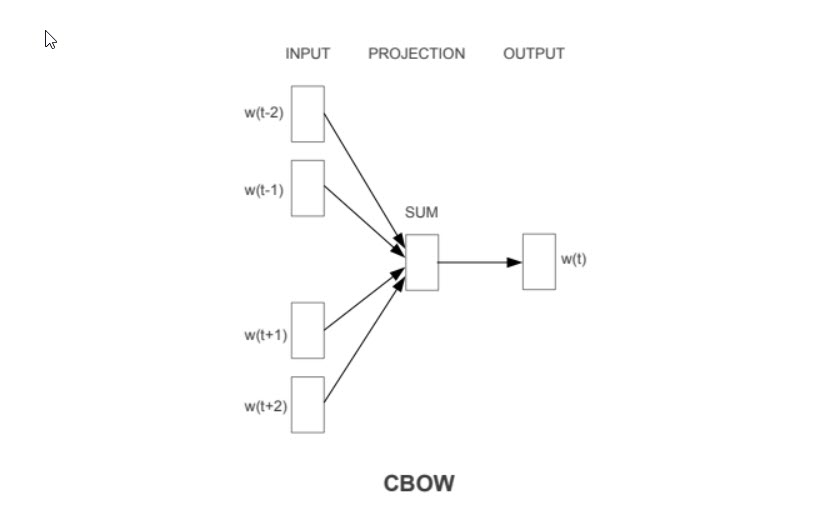



**Continuous skip-gram / Skip-gram with negative sampling (SGNS)**

The model learns to predict the words surrounding a given input word.

The Skip-gram model architecture usually tries to achieve the reverse of what the CBOW model does. It tries to predict the source context words (surrounding words) given a target word (the center word). Considering our simple sentence from earlier, “the quick brown fox jumps over the lazy dog”. If we used the CBOW model, we get pairs of (context_window, target_word) where if we consider a context window of size 2, we have examples like ([quick, fox], brown), ([the, brown], quick), ([the, dog], lazy) and so on. Now considering that the skip-gram model’s aim is to predict the context from the target word, the model typically inverts the contexts and targets, and tries to predict each context word from its target word. Hence the task becomes to predict the context [quick, fox] given target word ‘brown’ or [the, brown] given target word ‘quick’ and so on. Thus the model tries to predict the context_window words based on the target_word. 

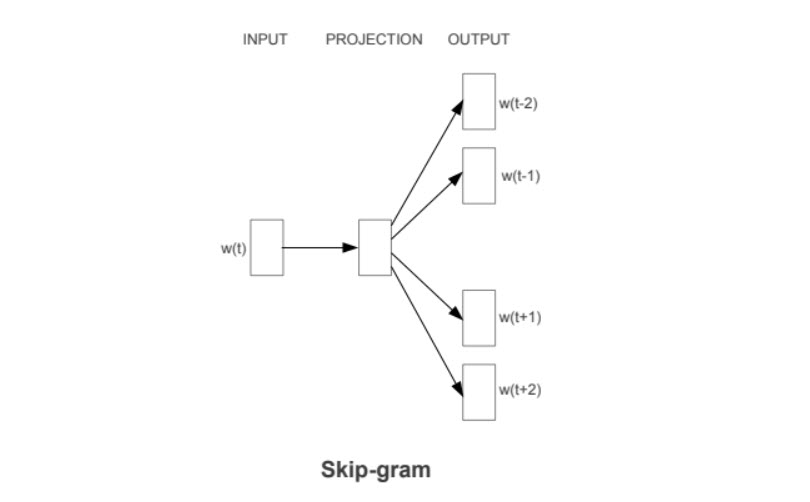



In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd

data = fetch_20newsgroups()

#Data Exploration 
print("Example News datapoint")
print(data.data[5])

print("Example News Group Category for the datapoint")
print(data.target_names[data.target[5]])

#For example purposes, the categories has been reduced to the following categories
categories = ['rec.autos', 'sci.med',
              'sci.space', 'comp.graphics']

#Train - Test dataset
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

## for processing
import re
import nltk

#### Preprocessing the text Data
'''
Preprocess a string.
:parameter
    :param text: string - name of column containing text
    :param lst_stopwords: list - list of stopwords to remove
    :param flg_stemm: bool - whether stemming is to be applied
    :param flg_lemm: bool - whether lemmitisation is to be applied
:return
    cleaned text
'''
def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and   
    ##characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()
    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

## Remove the stopwords
lst_stopwords = nltk.corpus.stopwords.words("english")

## Add custom words relevant to the context
lst_stopwords.append("subject")
lst_stopwords.append("lines")

##Cleaning the text data  
train.data = [utils_preprocess_text(i, flg_stemm=False, flg_lemm=True, 
          lst_stopwords=lst_stopwords) for i in train.data]

##Cleaning the text data  
test.data = [utils_preprocess_text(i, flg_stemm=False, flg_lemm=True, 
          lst_stopwords=lst_stopwords) for i in test.data]

train_df = pd.DataFrame({'Document': train.data, 
                   'Category': [train.target_names[i] for i in train.target],
                   'Target': train.target})

test_df = pd.DataFrame({'Document': test.data, 
                    'Category': [test.target_names[i] for i in test.target],
                    'Target': test.target})

df = train_df.append(test_df) 

Example News datapoint
From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)
Subject: Re: Rewording the Second Amendment (ideas)
Organization: VTT
Lines: 58

In article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:
>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:
>
>> >> The massive destructive power of many modern weapons, makes the
>> >> cost of an accidental or crimial usage of these weapons to great.
>> >> The weapons of mass destruction need to be in the control of
>> >> the government only.  Individual access would result in the
>> >> needless deaths of millions.  This makes the right of the people
>> >> to keep and bear many modern weapons non-existant.

>> >Thanks for stating where you're coming from.  Needless 

In [ ]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

review_lines = list()
lines = df['Document'].values.tolist()

for line in lines:   
    tokens = word_tokenize(line)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word    
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words    
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    review_lines.append(words)

**Robust Word2Vec Models with Gensim**

The gensim framework, created by Radim Řehůřek consists of a robust, efficient and scalable implementation of the Word2Vec model. 
In the workflow, the corpus will be tokenized and then focus on the following four parameters in the Word2Vec model to build it.
* size: The word embedding dimensionality
* window: The context window size
* min_count: The minimum word count
* sample: The downsample setting for frequent words

In [ ]:
import gensim 

EMBEDDING_DIM = 500
# train word2vec model
model = gensim.models.Word2Vec(sentences=review_lines, size=EMBEDDING_DIM, window=5, workers=4, min_count=1)
# vocab size
words = list(model.wv.vocab)
print('Vocabulary size: %d' % len(words))

Vocabulary size: 41708


In [ ]:
# save model in ASCII (word2vec) format
filename = 'ng_embedding_word2vec.txt'
model.wv.save_word2vec_format(filename, binary=False)

In [ ]:
import os
import numpy as np
embeddings_index = {}
f = open(os.path.join('', 'ng_embedding_word2vec.txt'),  encoding = "utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:])
    embeddings_index[word] = coefs
f.close()

In [ ]:
X_train = train.data
y_train = train.target
X_test = test.data
y_test = test.target

In [ ]:
total_reviews = X_train + X_test
max_length = 500 # try other options like mean of sentence lengths

In [ ]:
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

VALIDATION_SPLIT = 0.2

# vectorize the text samples into a 2D integer tensor
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(review_lines)
sequences = tokenizer_obj.texts_to_sequences(review_lines)

# pad sequences
word_index = tokenizer_obj.word_index
print('Found %s unique tokens.' % len(word_index))

review_pad = pad_sequences(sequences, maxlen=max_length)
news_groups =  df['Target'].values
print('Shape of review tensor:', review_pad.shape)
print('Shape of news groups tensor:', news_groups.shape)

# split the data into a training set and a validation set
indices = np.arange(review_pad.shape[0])
np.random.shuffle(indices)
review_pad = review_pad[indices]
news_groups = news_groups[indices]
num_validation_samples = int(VALIDATION_SPLIT * review_pad.shape[0])

X_train_pad = review_pad[:-num_validation_samples]
y_train = news_groups[:-num_validation_samples]
X_test_pad = review_pad[-num_validation_samples:]
y_test = news_groups[-num_validation_samples:]


Found 41708 unique tokens.
Shape of review tensor: (3940, 500)
Shape of news groups tensor: (3940,)


In [ ]:
print('Shape of X_train_pad tensor:', X_train_pad.shape)
print('Shape of y_train tensor:', y_train.shape)

print('Shape of X_test_pad tensor:', X_test_pad.shape)
print('Shape of y_test tensor:', y_test.shape)

Shape of X_train_pad tensor: (3152, 500)
Shape of y_train tensor: (3152,)
Shape of X_test_pad tensor: (788, 500)
Shape of y_test tensor: (788,)


In [ ]:
#Create the embedding dimension
EMBEDDING_DIM =500
num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))

for word, i in word_index.items():
    if i > num_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.initializers import Constant

# define model
model = Sequential()
# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=max_length,
                            trainable=False)

model.add(embedding_layer)
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(4, activation='sigmoid'))
print(model.summary())

# compile network
model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# fit the model
model.fit(X_train_pad, y_train, batch_size=128, epochs=25, validation_data=(X_test_pad, y_test), verbose=2) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 500)          20854500  
                                                                 
 conv1d (Conv1D)             (None, 496, 128)          320128    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 248, 128)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 31744)             0         
                                                                 
 dense (Dense)               (None, 4)                 126980    
                                                                 
Total params: 21,301,608
Trainable params: 447,108
Non-trainable params: 20,854,500
______________________________________

In [ ]:
# evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test, batch_size=128)
print('Accuracy: %f' % (accuracy*100))

7/7 [==============================] - 4s 590ms/step - loss: 1.4944 - accuracy: 0.6942
Accuracy: 69.416243


In [ ]:
test_sample_1 = test.data[0]
test_samples_tokens = tokenizer_obj.texts_to_sequences(test_sample_1)
test_samples_tokens_pad = pad_sequences(test_samples_tokens, maxlen=500)

model.predict(x=test_samples_tokens_pad)

array([[0.46063414, 0.4985954 , 0.5308392 , 0.47884187],
       [0.40223876, 0.21224555, 0.4217806 , 0.7275361 ],
       [0.46063414, 0.4985954 , 0.5308392 , 0.47884187],
       ...,
       [0.46063414, 0.4985954 , 0.5308392 , 0.47884187],
       [0.46187508, 0.30389988, 0.16670364, 0.7073012 ],
       [0.5315739 , 0.44611555, 0.12648809, 0.6401244 ]], dtype=float32)

**References**

* __[Efficient Estimation of Word Representations in Vector Space](https://arxiv.org/abs/1301.3781)__ 
* __[Distributed Representations of Words and Phrases and their Compositionality](https://arxiv.org/pdf/1310.4546.pdf)__ 
* __[A hands-on intuitive approach to Deep Learning Methods for Text Data — Word2Vec, GloVe and FastText](https://towardsdatascience.com/understanding-feature-engineering-part-4-deep-learning-methods-for-text-data-96c44370bbfa)__
* __[The Illustrated Word2vec](https://jalammar.github.io/illustrated-word2vec/)__ 
* __[Word2Vec Implementation Reference](https://github.com/javaidnabi31/Word-Embeddding-Sentiment-Classification/blob/master/word2vec.ipynb)__

**The GloVe Model** 

The __[GloVe](https://nlp.stanford.edu/pubs/glove.pdf)__ model stands for Global Vectors which is an unsupervised learning model which can be used to obtain dense word vectors similar to Word2Vec. However the technique is different and training is performed on an aggregated global word-word co-occurrence matrix, giving us a vector space with meaningful sub-structures. 

Methods like skip-gram may do better on the analogy task, but they poorly utilize the statistics of the corpus on a global level. 

The basic methodology of the GloVe model is to first create a huge word-context co-occurence matrix consisting of (word, context) pairs such that each element in this matrix represents how often a word occurs with the context (which can be a sequence of words). The idea then is to apply matrix factorization to approximate this matrix as depicted in the following figure.

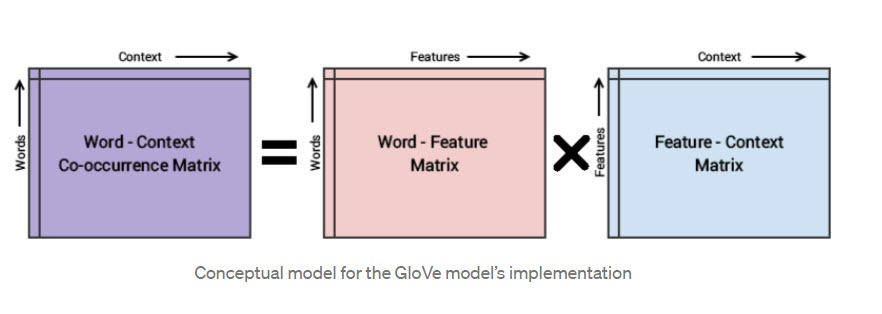

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

#vectorizer = TextVectorization(max_tokens=20000, output_sequence_length=200)
vectorizer = TextVectorization(max_tokens=20000, output_sequence_length=600)
text_ds = tf.data.Dataset.from_tensor_slices(train.data).batch(128)
vectorizer.adapt(text_ds)

Load pre-trained word embeddings

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2022-01-04 07:49:14--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-01-04 07:49:14--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-01-04 07:49:15--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.2’

glove

In [ ]:
import os
path_to_glove_file = os.path.join(
    #os.path.expanduser("~"), "/content/glove.6B.100d.txt"
    os.path.expanduser("~"), "/content/glove.6B.300d.txt"
)

embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
#Prepare a corresponding embedding matrix that we can use in a Keras Embedding layer. 
#It's a simple NumPy matrix where entry at index i is the pre-trained vector for the word of index i in our vectorizer's vocabulary.
voc = vectorizer.get_vocabulary()
word_index = dict(zip(voc, range(len(voc))))

num_tokens = len(voc) + 2
#embedding_dim = 100
embedding_dim = 300
hits = 0
misses = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))


Converted 14795 words (5205 misses)


In [ ]:
#Load the pre-trained word embeddings matrix into an Embedding layer.
#set trainable=False so as to keep the embeddings fixed.

from tensorflow.keras.layers import Embedding
from tensorflow import keras

embedding_layer = Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False,
)

In [ ]:
#Build the model
#A simple 1D convnet with global max pooling and a classifier at the end.

from tensorflow.keras import layers

int_sequences_input = keras.Input(shape=(None,), dtype="int64")
embedded_sequences = embedding_layer(int_sequences_input)
x = layers.Conv1D(128, 5, activation="relu")(embedded_sequences)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(128, 5, activation="relu")(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(128, 5, activation="relu")(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.5)(x)
preds = layers.Dense(len(categories), activation="softmax")(x)
model = keras.Model(int_sequences_input, preds)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_1 (Embedding)     (None, None, 300)         6000600   
                                                                 
 conv1d_1 (Conv1D)           (None, None, 128)         192128    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, None, 128)        0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, None, 128)         82048     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, None, 128)        0         
 1D)                                                         

In [ ]:
#Train the model 

x_train = vectorizer(np.array([[s] for s in train.data])).numpy()
x_val = vectorizer(np.array([[s] for s in test.data])).numpy()

y_train = np.array(train.target)
y_val = np.array(test.target)

model.compile(
    loss="sparse_categorical_crossentropy", optimizer="rmsprop", metrics=["acc"]
)
model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
19/19 [==============================] - 43s 2s/step - loss: 1.3177 - acc: 0.4233 - val_loss: 0.6929 - val_acc: 0.8394
Epoch 2/20
19/19 [==============================] - 33s 2s/step - loss: 0.4462 - acc: 0.8613 - val_loss: 0.3662 - val_acc: 0.8838
Epoch 3/20
19/19 [==============================] - 32s 2s/step - loss: 0.2505 - acc: 0.9184 - val_loss: 0.5318 - val_acc: 0.8337
Epoch 4/20
19/19 [==============================] - 31s 2s/step - loss: 0.1505 - acc: 0.9548 - val_loss: 0.2388 - val_acc: 0.9225
Epoch 5/20
19/19 [==============================] - 31s 2s/step - loss: 0.1037 - acc: 0.9674 - val_loss: 0.2606 - val_acc: 0.9225
Epoch 6/20
19/19 [==============================] - 31s 2s/step - loss: 0.1020 - acc: 0.9721 - val_loss: 0.2622 - val_acc: 0.9270
Epoch 7/20
19/19 [==============================] - 31s 2s/step - loss: 0.0240 - acc: 0.9970 - val_loss: 0.2352 - val_acc: 0.9384
Epoch 8/20
19/19 [==============================] - 31s 2s/step - loss: 0.0430 - acc: 0.99

In [ ]:
string_input = keras.Input(shape=(1,), dtype="string")
x = vectorizer(string_input)
preds = model(x)
end_to_end_model = keras.Model(string_input, preds)

probabilities = end_to_end_model.predict(
    [[test.data[0]]]
)

categories[np.argmax(probabilities[0])]

'comp.graphics'

In [ ]:
probabilities[0]

array([1.8129064e-25, 5.5424825e-26, 2.6691406e-18, 1.0000000e+00],
      dtype=float32)

References: 

__[GloVe implementation](https://blog.keras.io/using-pre-trained-word-embeddings-in-a-keras-model.html)__



**The FastText Model**

The FastText model was first introduced by Facebook in 2016 as an extension and supposedly improvement of the vanilla Word2Vec model.

The framework is open-sourced by Facebook on GitHub and claims to have the following.

* Recent state-of-the-art English word vectors.
* Word vectors for 157 languages trained on Wikipedia and Crawl.
* Models for language identification and various supervised tasks.

In general, predictive models like the Word2Vec model typically considers each word as a distinct entity (e.g. where) and generates a dense embedding for the word. However this poses to be a serious limitation with languages having massive vocabularies and many rare words which may not occur a lot in different corpora. The Word2Vec model typically ignores the morphological structure of each word and considers a word as a single entity. The FastText model considers each word as a Bag of Character n-grams. This is also called as a subword model in the original implementation __[Enriching Word Vectors with Subword Information](https://arxiv.org/pdf/1607.04606.pdf)__.





References: 
__[FastText](https://fasttext.cc/blog/2016/08/18/blog-post.html)__